Visit analyzewithahmed.tech

In [321]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
#Adjusts the config of the plots
matplotlib.rcParams['figure.figsize'] = (12,8) 
pd.options.mode.chained_assignment = None
sns.set_style('whitegrid')

In [346]:
#Import Dataset
df=pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [348]:
#Removing missing data
df = df.dropna()

In [349]:
# Looping thourgh the columns to find the percentage of missing data.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [350]:
df = df.drop_duplicates('name')

In [351]:
#Change column data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [352]:
#Create year column 
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [353]:
df.describe(include = ['O']).T

,count,unique,top,freq
name,5336,5336,Avatar,1
rating,5336,10,R,2557
genre,5336,15,Comedy,1483
released,5336,2546,"December 25, 2008 (United States)",7
director,5336,2045,Woody Allen,33
writer,5336,3178,Woody Allen,32
star,5336,1830,Nicolas Cage,39
country,5336,50,United States,4251
company,5336,1464,Universal Pictures,328


In [354]:
com = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)
com = com.reset_index().head(10)
com['Profit'] = (com['gross']-com['budget'])
com

/var/folders/pw/k8bm63x563bdx__7qxzq3w880000gn/T/ipykernel_31557/2015509445.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,company,budget,gross,Profit
0,Warner Bros.,19149300000,53402787586,34253487586
1,Universal Pictures,15824130001,50762944661,34938814660
2,Columbia Pictures,15011107000,40870093831,25858986831
3,Twentieth Century Fox,11339600000,39333826704,27994226704
4,Paramount Pictures,13323450000,38995978170,25672528170
5,Walt Disney Pictures,9876700000,32859517114,22982817114
6,New Line Cinema,5396200000,18774065284,13377865284
7,Marvel Studios,2444000000,13546776896,11102776896
8,DreamWorks Animation,3344000000,11873612858,8529612858
9,Dreamworks Pictures,3702700000,10924475124,7221775124


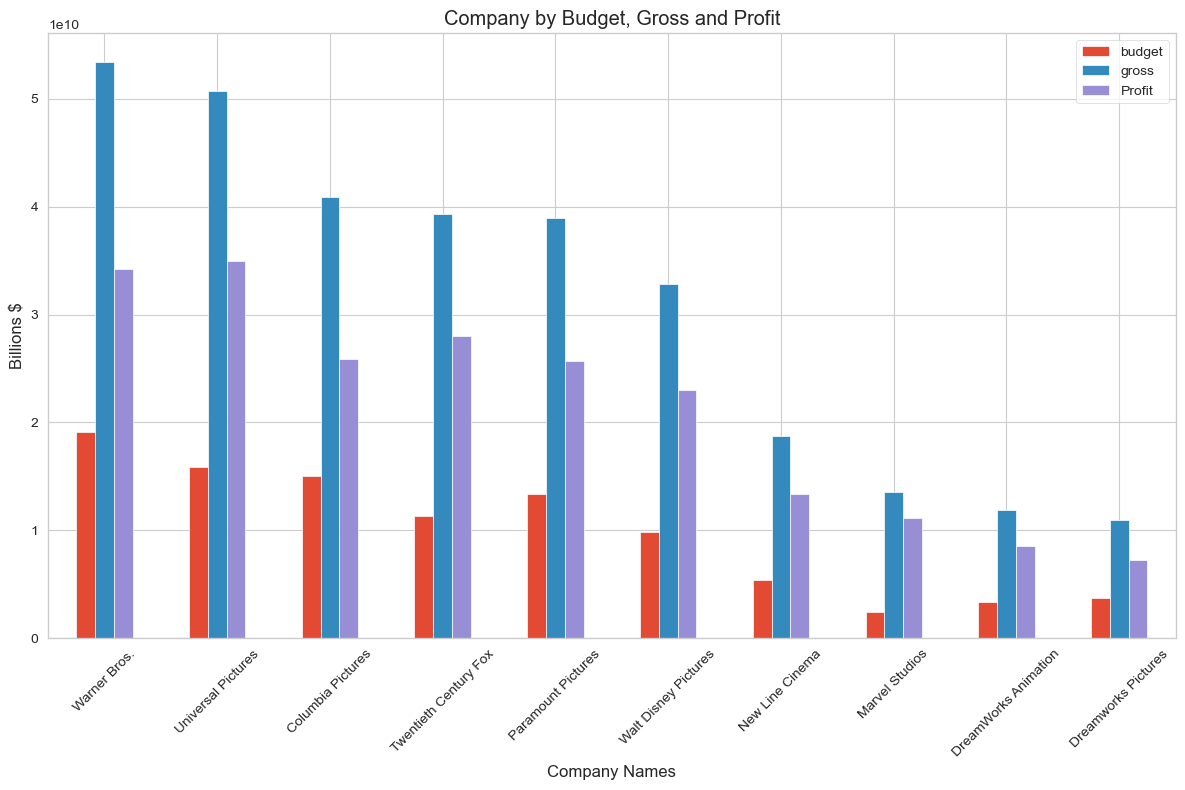

In [322]:
com.plot(kind='bar', x='company', rot='45')
plt.title('Company by Budget, Gross and Profit')
plt.xlabel("Company Names")
plt.ylabel("Billions $")
plt.tight_layout()

Text(0, 0.5, 'Gross Earning (Billions)')

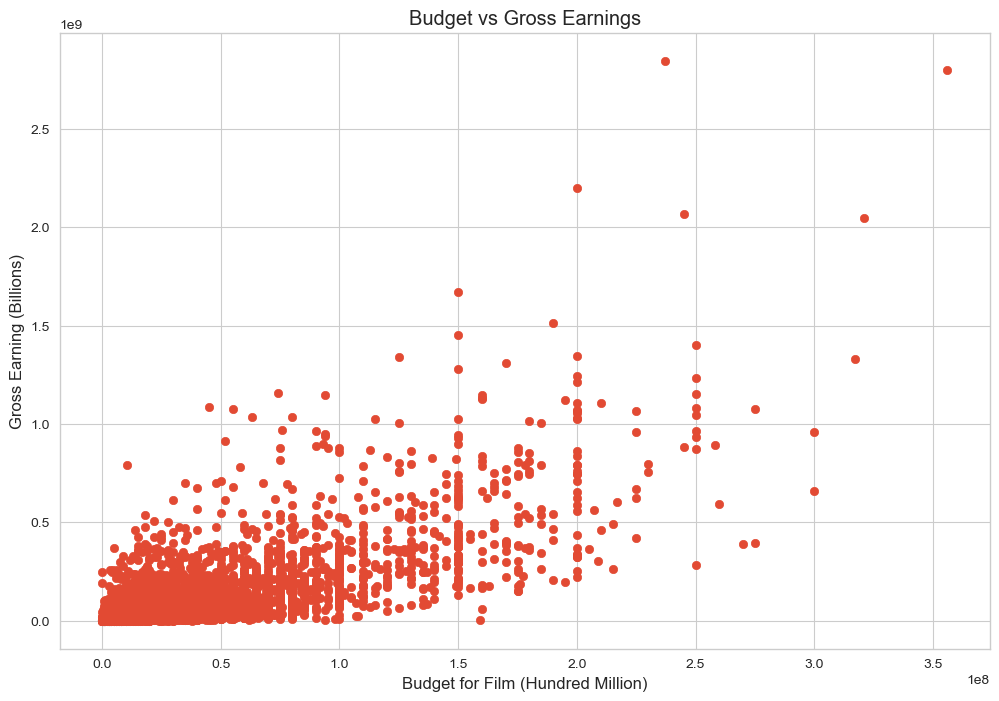

In [323]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film (Hundred Million)')
plt.ylabel('Gross Earning (Billions)')

In [324]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,525,7.8,1100000,780,1251,1523,47,237000000,2847246203,1372,162,2009
7445,388,5,0,2019,137,8.4,903000,105,509,1461,47,356000000,2797501328,976,181,2019
3045,4909,5,6,1997,532,7.8,1100000,780,1251,1065,47,200000000,2201647264,1372,194,1997
6663,3643,5,0,2015,527,7.8,876000,763,1788,356,47,245000000,2069521700,939,138,2015
7244,389,5,0,2018,145,8.4,897000,105,509,1461,47,321000000,2048359754,976,149,2018


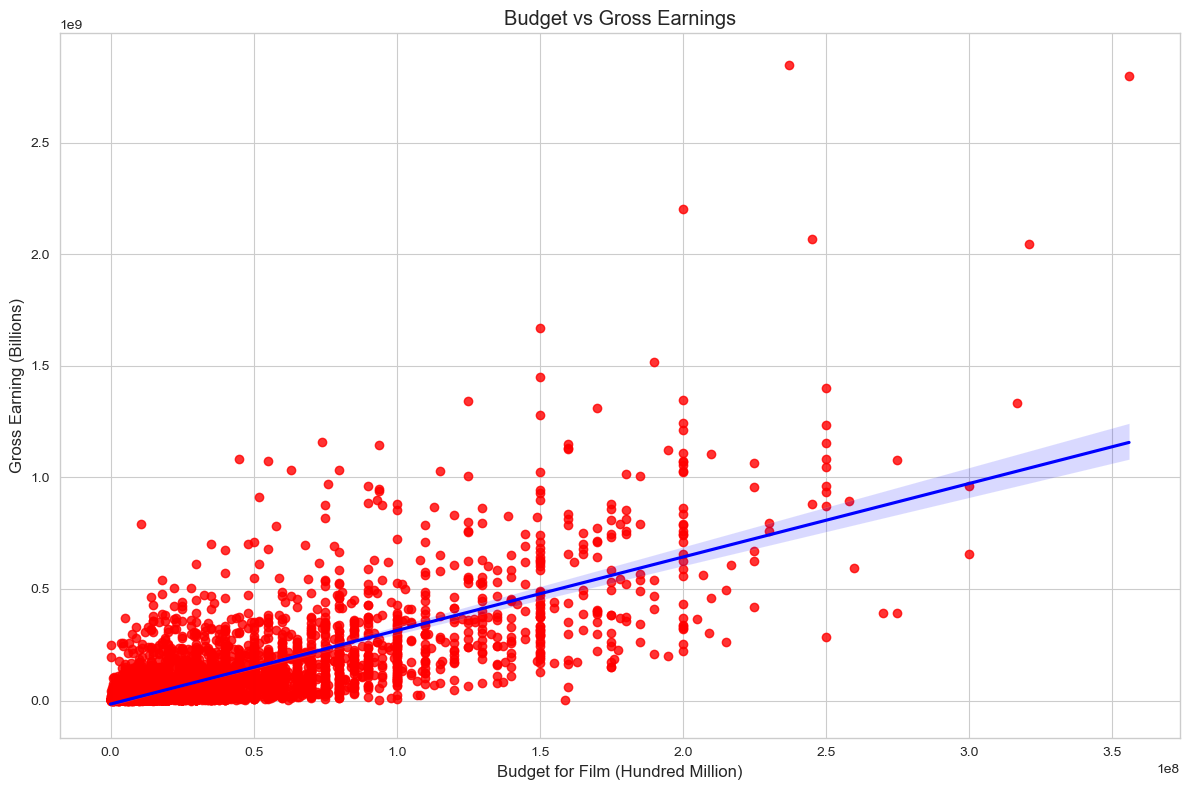

In [335]:
#Plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},
           line_kws={'color':'blue'})

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film (Hundred Million)')
plt.ylabel('Gross Earning (Billions)')
plt.tight_layout()

In [292]:
df.corr()

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.061236,0.207542,0.326118,0.271863,0.075414,0.998707
score,0.061236,1.000000,0.473250,0.071325,0.222235,0.413459,0.066723
votes,0.207542,0.473250,1.000000,0.438567,0.618162,0.348798,0.204546
budget,0.326118,0.071325,0.438567,1.000000,0.737723,0.317912,0.318617
gross,0.271863,0.222235,0.618162,0.737723,1.000000,0.276189,0.266149
runtime,0.075414,0.413459,0.348798,0.317912,0.276189,1.000000,0.075648
yearcorrect,0.998707,0.066723,0.204546,0.318617,0.266149,0.075648,1.000000


In [293]:
#High corr between budget and gross

Text(120.72222222222221, 0.5, 'Movie Features')

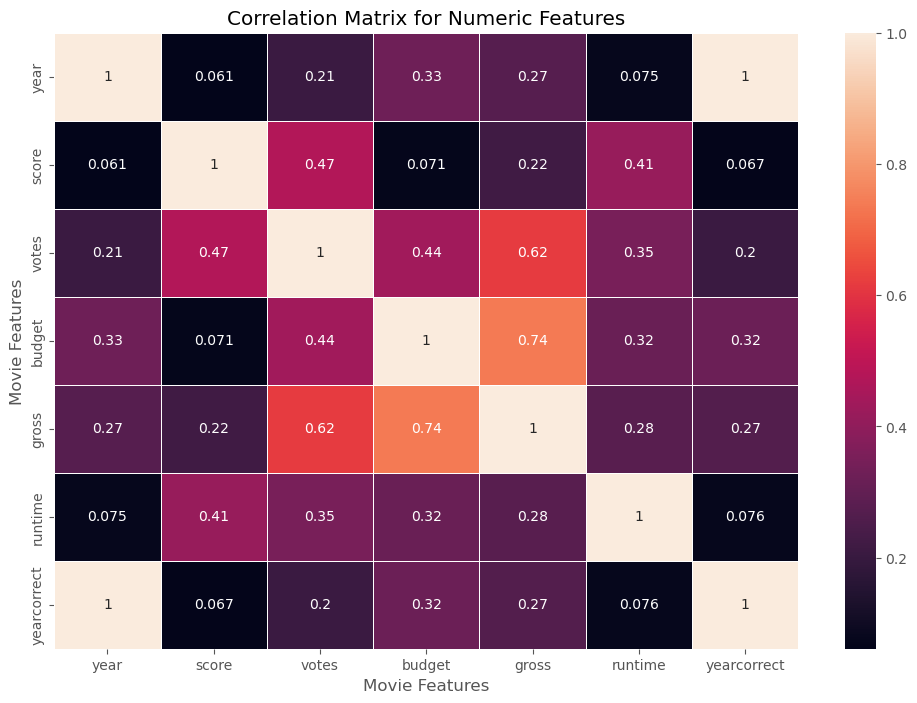

In [294]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,linecolor='white',linewidth=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [338]:
#Look at company
df_numerized = df

for col_name in df_numerized.columns:
     if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029775,0.011915,0.025221,-0.006524,0.014977,0.012862,0.016134,0.018693,-0.009025,-0.025491,0.023097,0.004959,0.023055,0.010925,0.025243
rating,-0.029775,1.000000,0.148543,0.018993,0.018745,0.068714,0.005407,0.012756,-0.003142,0.010559,0.009236,-0.202192,-0.178963,-0.093193,0.144582,0.021540
genre,0.011915,0.148543,1.000000,-0.075050,0.020174,0.039223,-0.134223,-0.009479,0.013931,0.001744,-0.008524,-0.366326,-0.246023,-0.070841,-0.055838,-0.070898
year,0.025221,0.018993,-0.075050,1.000000,-0.000740,0.061236,0.207542,-0.036977,-0.025805,-0.035542,-0.068017,0.326118,0.271863,-0.011337,0.075414,0.998707
released,-0.006524,0.018745,0.020174,-0.000740,1.000000,0.045525,0.027054,0.000370,0.009538,0.014112,-0.014850,0.024285,0.009682,-0.002003,0.009972,-0.005048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
budget,0.023097,-0.202192,-0.366326,0.326118,0.024285,0.071325,0.438567,-0.006229,-0.040011,-0.022859,0.051289,1.000000,0.737723,0.169634,0.317912,0.318617
gross,0.004959,-0.178963,-0.246023,0.271863,0.009682,0.222235,0.618162,-0.025160,-0.037735,-0.001711,0.058941,0.737723,1.000000,0.151064,0.276189,0.266149
company,0.023055,-0.093193,-0.070841,-0.011337,-0.002003,0.024070,0.122424,-0.009265,-0.003672,0.014075,0.048533,0.169634,0.151064,1.000000,0.038916,-0.015849
runtime,0.010925,0.144582,-0.055838,0.075414,0.009972,0.413459,0.348798,0.019221,-0.016465,0.011889,-0.037506,0.317912,0.276189,0.038916,1.000000,0.075648


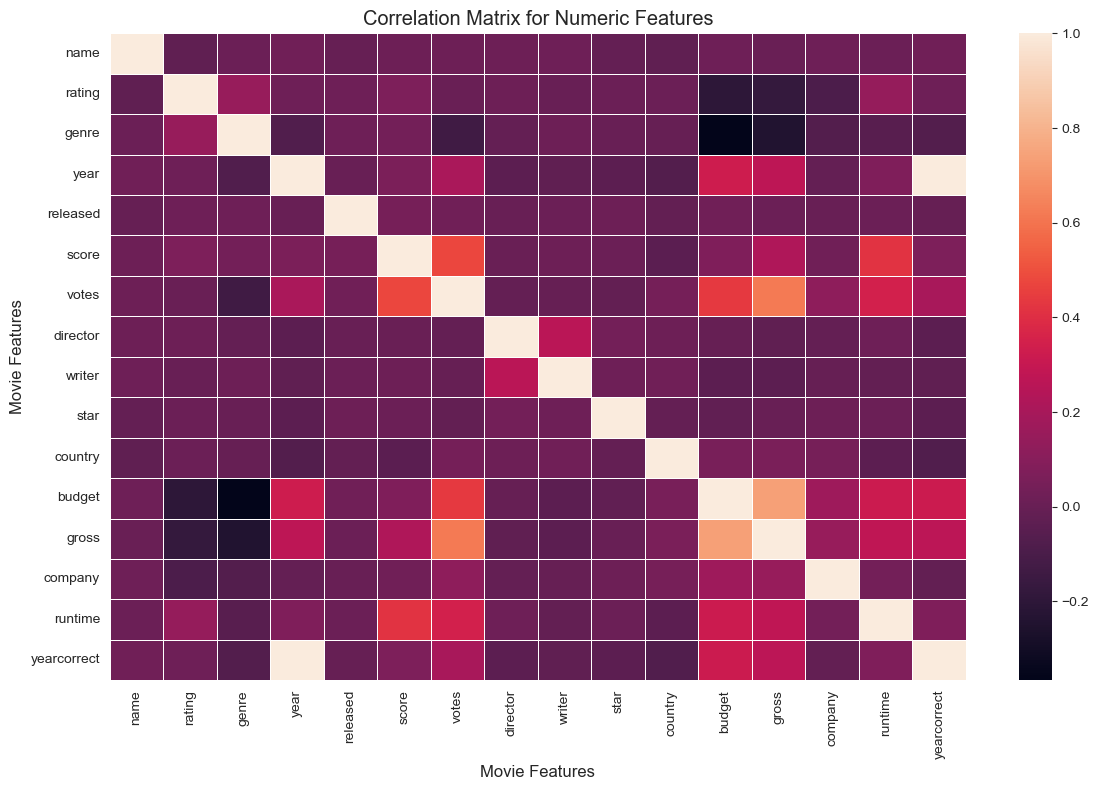

In [340]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=False,linecolor='white',linewidth=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.tight_layout()

In [341]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[((sorted_pairs)>0.5) & ((sorted_pairs)<1)].sort_values(ascending=False)
high_corr.head()

year         yearcorrect    0.998707
yearcorrect  year           0.998707
gross        budget         0.737723
budget       gross          0.737723
votes        gross          0.618162
dtype: float64

In [300]:
groupby_genre_year = df.groupby(['genre', 'year']).mean()
groupby_genre_year

name    rating     released     score          votes  \
genre year                                                                
0     1980  3611.545455  4.727273  1140.272727  6.318182  142163.636364   
      1981  2465.769231  4.769231  1291.615385  6.607692  112947.076923   
      1982  2606.533333  5.333333  1128.400000  6.320000   97986.666667   
      1983  2681.523810  4.952381  1470.238095  6.047619   69338.095238   
      1984  2630.565217  4.869565  1372.565217  6.434783  115269.565217   
...                 ...       ...          ...       ...            ...   
13    2005  3164.000000  5.000000   295.000000  6.500000  115000.000000   
      2015  3952.000000  6.000000   941.000000  4.700000   40000.000000   
      2019  4304.000000  5.000000  1875.000000  5.600000   15000.000000   
14    1982   438.000000  4.000000   733.000000  6.400000    1500.000000   
      1993  3035.000000  6.000000  1736.000000  5.500000    4200.000000   

               director       writer         star    country        budget  \
genre year                                                                   
0     1980   815.090909  1751.818182   817.454545  47.000000  1.790909e+07   
      1981  1100.923077  1324.153846  1001.384615  43.230769  1.357692e+07   
      1982  1205.600000  1202.600000   838.800000  44.600000  1.184667e+07   
      1983  1206.095238  1551.190476  1083.380952  44.523810  1.537176e+07   
      1984  1243.086957  1504.391304   780.478261  44.086957  1.571957e+07   
...                 ...          ...          ...        ...           ...   
13    2005  2002.000000   396.000000  1405.000000  47.000000  2.600000e+07   
      2015  1618.000000   235.000000   792.000000  47.000000  4.000000e+06   
      2019   469.000000   695.000000  1218.000000  47.000000  8.000000e+06   
14    1982   601.000000  3120.000000  1806.000000  47.000000  1.100000e+07   
      1993  1221.000000  2886.000000  1142.000000  46.000000  1.000000e+07   

                   gross      company     runtime  yearcorrect  
genre year                                                      
0     1980  8.486993e+07   965.181818  116.090909  1980.090909  
      1981  5.278621e+07   826.538462  106.538462  1981.076923  
      1982  3.708966e+07   903.000000  106.000000  1982.066667  
      1983  4.870578e+07   809.904762  106.476190  1983.047619  
      1984  6.938428e+07   815.608696  107.608696  1984.000000  
...                  ...          ...         ...          ...  
13    2005  9.625820e+07   547.000000   85.000000  2005.000000  
      2015  5.242586e+07  1387.000000   91.000000  2015.000000  
      2019  3.659936e+07  1236.000000  102.000000  2019.000000  
14    1982  1.736123e+06   824.000000   90.000000  1982.000000  
      1993  1.828976e+07  1135.000000  111.000000  1993.000000  

[380 rows x 14 columns]

In [327]:
year_budget = df.groupby(by=['yearcorrect'])['budget','gross'].mean()
year_budget = year_budget.reset_index()
year_budget = year_budget.drop(year_budget[year_budget.yearcorrect > 2019].index)
year_budget

/var/folders/pw/k8bm63x563bdx__7qxzq3w880000gn/T/ipykernel_31557/865354635.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,yearcorrect,budget,gross
0,1980,9.848611e+06,4.526227e+07
1,1981,1.220463e+07,3.156359e+07
2,1982,1.226901e+07,3.969830e+07
3,1983,1.036540e+07,2.700930e+07
4,1984,1.292335e+07,3.477040e+07
...,...,...,...
35,2015,4.569634e+07,1.703949e+08
36,2016,5.062468e+07,1.617105e+08
37,2017,5.453050e+07,1.908749e+08
38,2018,4.929050e+07,1.950644e+08


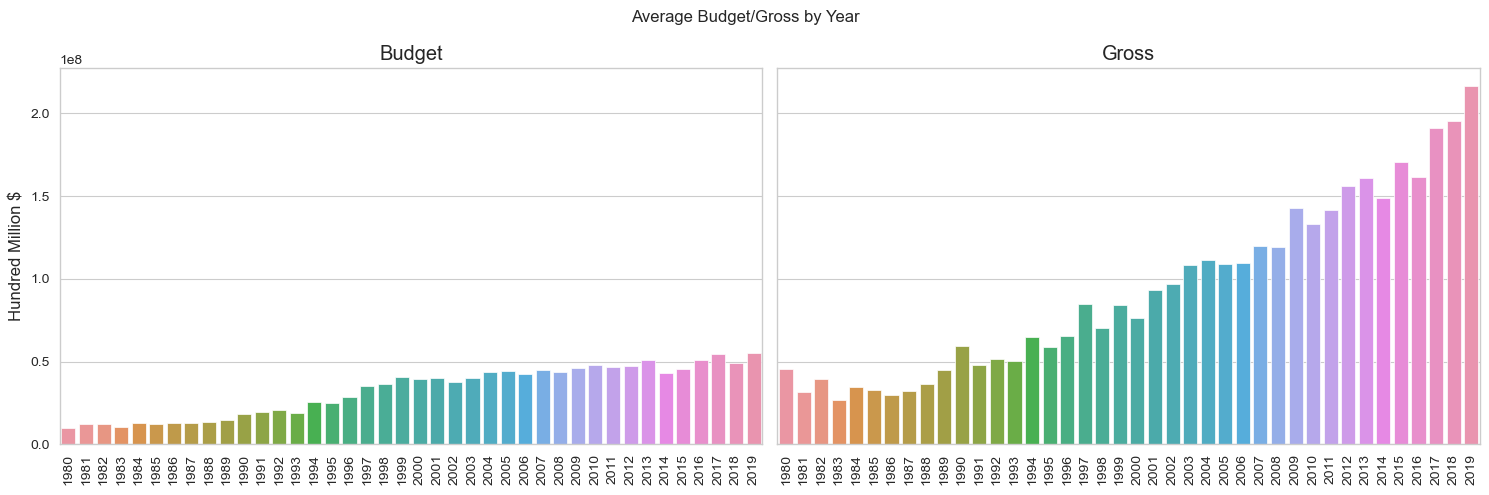

In [334]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Average Budget/Gross by Year')

sns.barplot(ax=axes[1],data=year_budget,x='yearcorrect',y='gross').set(xlabel=None,ylabel=None)
axes[1].set_title('Gross')

sns.barplot(ax=axes[0],data=year_budget,x='yearcorrect',y='budget').set(xlabel=None,ylabel="Hundred Million $")
axes[0].set_title('Budget')

plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)


plt.tight_layout()


In [302]:
year_budget_gross = df.groupby(['year', 'budget', 'gross']).mean()
year_budget_gross = groupby_year_budget_gross.reset_index()

year_budget_gross


,year,budget,gross,score,votes,runtime,yearcorrect
0,1980,550000,39754601,6.4,123000.0,95.0,1980.0
1,1980,1000000,21448782,6.8,66000.0,89.0,1980.0
2,1980,3000000,6342668,6.0,11000.0,101.0,1980.0
3,1980,3500000,7063886,7.1,9000.0,131.0,1980.0
4,1980,3500000,83453539,7.7,221000.0,88.0,1980.0
...,...,...,...,...,...,...,...
5416,2020,85000000,319715683,6.5,102000.0,99.0,2020.0
5417,2020,90000000,426505244,6.6,140000.0,124.0,2020.0
5418,2020,135000000,111105497,6.8,42000.0,100.0,2020.0
5419,2020,175000000,245487753,5.6,53000.0,101.0,2020.0


In [148]:
fig_bar=px.bar(year_budget_gross,x='year',y='gross',color='budget')
fig_bar.update_layout(bargap = 0.01)


In [149]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [150]:
x=pd.DataFrame(df, columns=['budget'])
y=pd.DataFrame(df, columns=['gross'])
regression.fit(x,y)

LinearRegression()

In [151]:
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(x,y)}')

The slope coefficient is: [3.33507184]
The intercept is: -16863517.22503178
The r-squared is: 0.5479649457884106


In [343]:
budget = 500000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $500 million film is around ${revenue_estimate}')

The estimated revenue for a $500 million film is around $1651000000.0


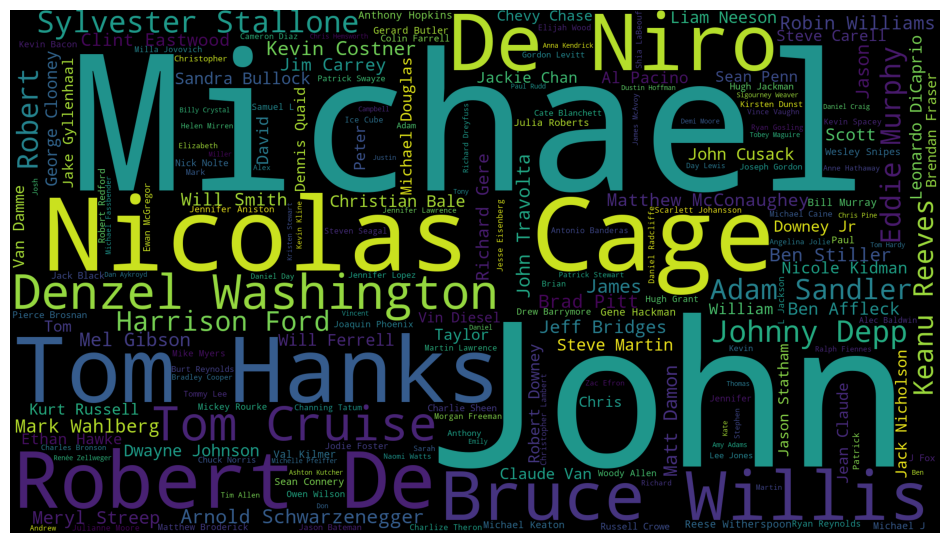

In [357]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(background_color='Black',width=1920,height=1080).generate(" ".join(df.star))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

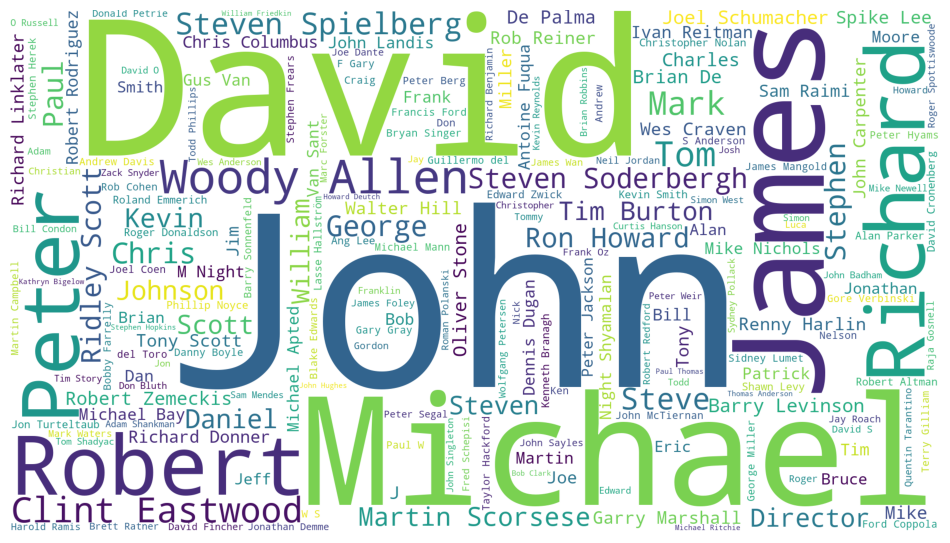

In [356]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()